In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
directory = os.path.join('sample_data', 'california_housing_train.csv') # Output: sample_data/california_housing_train.csv

if os.path.isfile(directory):
  print("File ditemukan")


File ditemukan


In [11]:
dataset = pd.read_csv(directory)

In [12]:
dataset.head() # Mengeluarkan beberapa data awal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [13]:
dataset.info() # Memunculkan informasi awal mengenai dataset (data langsung dikenal sebagai float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [14]:
dataset.describe() # Mengeluarkan analisa awal mengenai dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
dataset_numbers = dataset.select_dtypes(include = ['float64'])
dataset_numbers.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Assignments

1. Visualisasikan korelasi feature median_house_value dengan `total_rooms`, `housing_median_age`, dan `households` menggunakan scatter plot.

2. Lakukan training dengan komposisi berikut:
  * 90% training data & 10% testing
  * 85% training data & 15% testing

  Lalu lakukan regression menggunakan RandomForestRegressor. Bandingkan ketika skor r2 yang didapat (90% training, 85% training, 80% training yang sudah dilakukan sebagai contoh diatas).

  Tariklah kesimpulan yang didapat setelah membandingkan 3 skor tersebut.

3. Gunakan `SVR` (SVM Regression) (`from sklearn.svm import SVR`) untuk melakukan training. Bandingkan hasil r2 score yang didapat dengan `LinearRegression`. Tariklah kesimpulan yang didapat.
  * Hint: Cek https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html


soal nomor 1


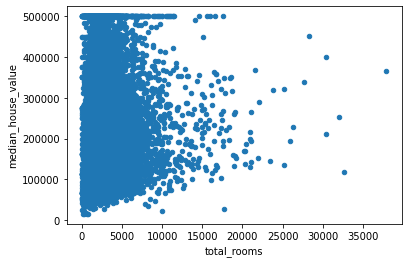

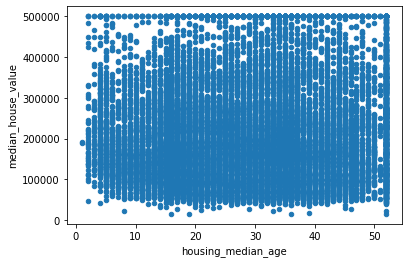

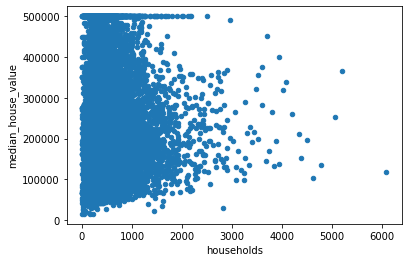

In [16]:
print("soal nomor 1")
dataset.plot(kind="scatter", x="total_rooms", y="median_house_value")
dataset.plot(kind="scatter", x="housing_median_age", y="median_house_value")
dataset.plot(kind="scatter", x="households", y="median_house_value")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1918a21438>,
      dtype=object)

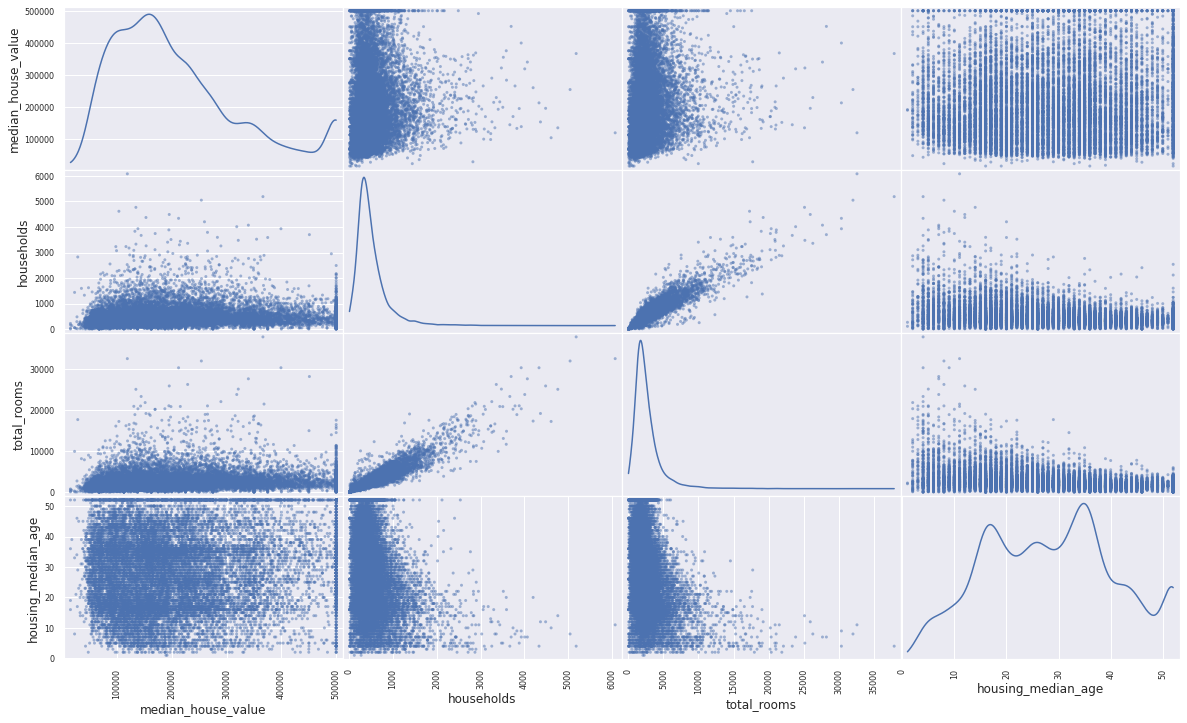

In [17]:
sns.set()
feat = ['median_house_value','households','total_rooms','housing_median_age']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal='kde')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

scaler = preprocessing.StandardScaler() 

dataset.columns

feature = dataset.drop(['median_house_value'], axis=1) # Hapus kolom median_house_value dari feature karena ini adalah variabel yang kita ingin diprediksi
label = dataset['median_house_value'] # Kolom median_house_value digunakan karena ini adalah yang ingin kita prediksi

feature_scaled = scaler.fit_transform(feature.values) # Features setelah discaling
label_scaled = scaler.fit_transform(dataset['median_house_value'].values.reshape(-1,1)).flatten() # Label/hasil prediksi setelah scaling


def testing_percent(pers):
  feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=pers) # 80% training, 20% testing

  linear_reg = linear_model.LinearRegression()
  linear_reg.fit(feature_train,label_train)
  r2_score(linear_reg.predict(feature_train), label_train)

  cross_validation_score = cross_val_score(linear_reg, feature_train,label_train, cv=10)
  reg_score = r2_score(linear_reg.predict(feature_test),label_test) 

  # print(cross_validation_score)
  # print(reg_score)

  forest_reg = RandomForestRegressor()

  forest_reg.fit(feature_train,label_train)
  r2_score(forest_reg.predict(feature_train), label_train)
  cross_validation_score = cross_val_score(forest_reg, feature_train, label_train, cv=10)

  # print(cross_validation_score)

  forest_score = r2_score(forest_reg.predict(feature_test), label_test) 
  print(forest_score)

  predictions = forest_reg.predict(feature_test)
  plt.scatter(label_test, predictions)


soal nomor 2.a
0.767255171133374


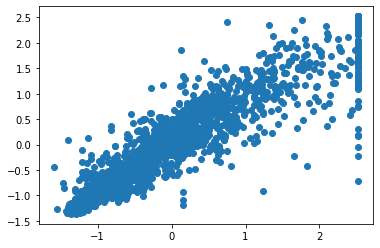

In [43]:
print("soal nomor 2.a")

testing_percent(0.1)

soal nomor 2.b
0.7512814831587491


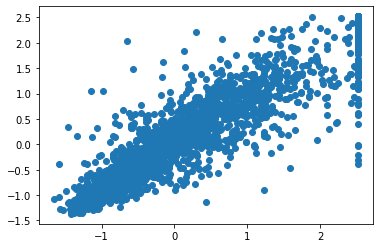

In [37]:
print("soal nomor 2.b")

testing_percent(0.15)

soal nomor 2.c
0.7673598993202515


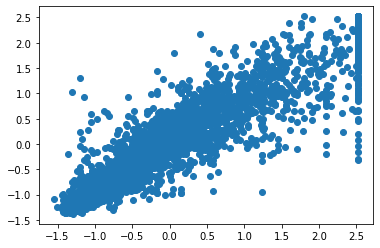

In [38]:
print("soal nomor 2.c")

testing_percent(0.2)

**Kesimpulan No 2**
Dari ke tiga grafik diatas, dapat kita tarik kesimpulan bahwa untuk testing data sebanyak 10 persen sampai 20 persen yang diambil dari data training menunjukan hasil yang tidak jauh berbeda. Dan testingnya memiliki tingkat akurasi yang cukup baik

In [20]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# svr_lin = SVR(kernel='linear', C=100, gamma='auto')
# svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [42]:
def testing_percent_SVR(svr):
  feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=svr)
  svr_rbf.fit(feature_train,label_train)
  svr_score = r2_score(svr_rbf.predict(feature_test), label_test) 
  print(svr_score)
  predictions = svr_rbf.predict(feature_test)
  plt.scatter(label_test, predictions)
def testing_percent_lin(lin):
  feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=lin)
  linear_reg.fit(feature_train,label_train)
  lin_score = r2_score(linear_reg.predict(feature_train), label_train)
  print(lin_score)
  predictions = linear_reg.predict(feature_test)
  plt.scatter(label_test, predictions)

0.7232711944313285


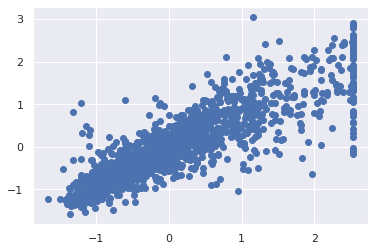

In [41]:
testing_percent_SVR(0.1)

0.7295955969995628


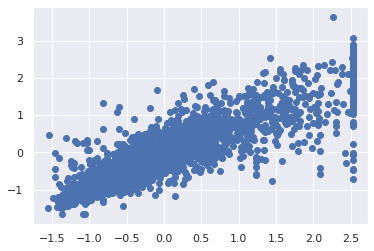

In [43]:
testing_percent_SVR(0.15)

0.717584295537377


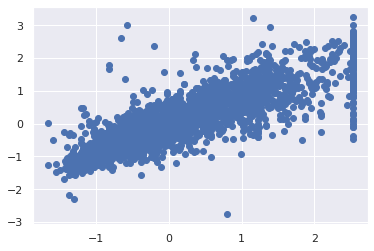

In [44]:
testing_percent_SVR(0.2)

0.44586719799566543


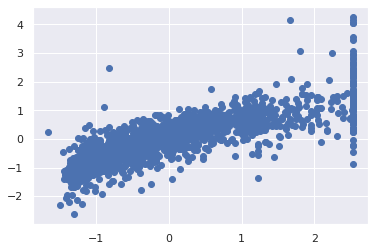

In [45]:
testing_percent_lin(0.1)

0.4473867041186993


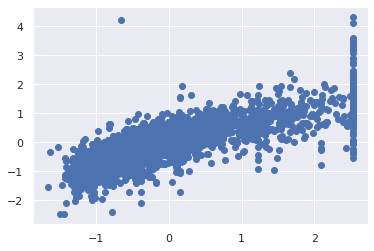

In [46]:
testing_percent_lin(0.15)

0.43951763738583993


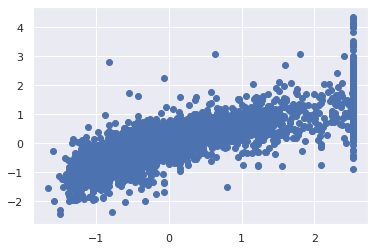

In [47]:
testing_percent_lin(0.2)

**Kesimpulan No 3:**
Setelah membandingkan nilai r2 antara SVR dan Linear, dapat kita simpulkan jika SVR lebih akurat digunakan untuk testing data korelasi median_house_value karena nilainya lebih besar jika kita bandingkan dengan linear